In [289]:
# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

IndentationError: unexpected indent (<ipython-input-289-fd07962cd9b8>, line 2)

In [444]:
import pandas as pd
import numpy as np

DATA_FOLDER = './data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [445]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [446]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [447]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [448]:
#load data #TODO explanations in extra cells
titanic = pd.read_excel(DATA_FOLDER+'/titanic.xls', sheetname='titanic')
titanic.rename(columns={'home.dest': 'home_dest'}, inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [449]:
# 1. data types of the attributes
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home_dest     object
dtype: object

In [450]:
# 1. value ranges - see min and max values
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [451]:
# 1. attributes that can be Categorical:
# pclass
print(np.unique(titanic[['pclass']].values))
print(np.unique(titanic[['survived']].values))
print(np.unique(titanic[['sex']].values))
print(np.unique(titanic[['cabin']].dropna().values))
print(np.unique(titanic[['embarked']].dropna().values))
print(np.unique(titanic[['boat']].dropna().astype(str).values))
#print(np.unique(titanic[['home_dest']].dropna().values))
#TODO can home_dest be categorical?


# transformation
titanic['pclass'] = titanic.pclass.astype('category')
titanic['survived'] = titanic.survived.astype('category')
titanic['sex'] = titanic.sex.astype('category')
titanic['cabin'] = titanic.cabin.astype('category')
titanic['embarked'] = titanic.embarked.astype('category')
titanic['boat'] = titanic.boat.astype('category')
#titanic['home_dest'] = titanic[['home_dest']].astype('category')

titanic.dtypes

[1 2 3]
[0 1]
['female' 'male']
['A10' 'A11' 'A14' 'A16' 'A18' 'A19' 'A20' 'A21' 'A23' 'A24' 'A26' 'A29'
 'A31' 'A32' 'A34' 'A36' 'A5' 'A6' 'A7' 'A9' 'B10' 'B101' 'B102' 'B11'
 'B18' 'B19' 'B20' 'B22' 'B24' 'B26' 'B28' 'B3' 'B30' 'B35' 'B36' 'B37'
 'B38' 'B39' 'B4' 'B41' 'B42' 'B45' 'B49' 'B5' 'B50' 'B51 B53 B55'
 'B52 B54 B56' 'B57 B59 B63 B66' 'B58 B60' 'B61' 'B69' 'B71' 'B73' 'B77'
 'B78' 'B79' 'B80' 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104'
 'C105' 'C106' 'C110' 'C111' 'C116' 'C118' 'C123' 'C124' 'C125' 'C126'
 'C128' 'C130' 'C132' 'C148' 'C2' 'C22 C26' 'C23 C25 C27' 'C28' 'C30' 'C31'
 'C32' 'C39' 'C45' 'C46' 'C47' 'C49' 'C50' 'C51' 'C52' 'C53' 'C54'
 'C55 C57' 'C6' 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C80' 'C82' 'C83'
 'C85' 'C86' 'C87' 'C89' 'C90' 'C91' 'C92' 'C93' 'C95' 'C97' 'C99' 'D'
 'D10 D12' 'D11' 'D15' 'D17' 'D19' 'D20' 'D21' 'D22' 'D26' 'D28' 'D30'
 'D33' 'D34' 'D35' 'D36' 'D37' 'D38' 'D40' 'D43' 'D45' 'D46' 'D47' 'D48'
 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10

pclass       category
survived     category
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin        category
embarked     category
boat         category
body          float64
home_dest      object
dtype: object

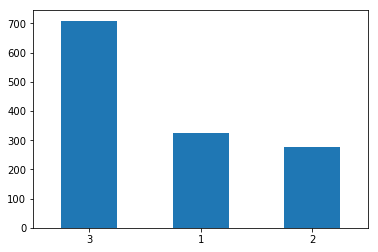

In [452]:
# 2. histogramms
%matplotlib inline
import matplotlib.pyplot as plt
# titanic.pclass.hist() 
# pclass is categoric variable, histogram makes only sense for metric variables
# bar plot:
titanic['pclass'].value_counts().plot(kind='bar', rot=0)

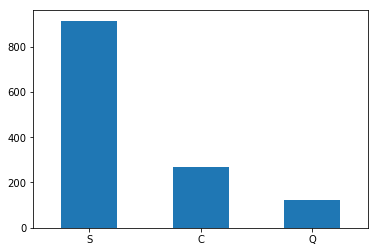

In [453]:
titanic['embarked'].value_counts().plot(kind='bar', rot=0)

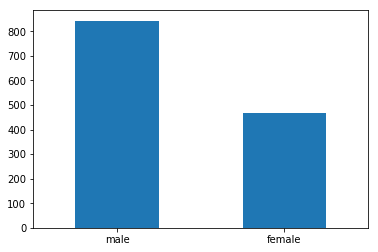

In [454]:
titanic['sex'].value_counts().plot(kind='bar', rot=0)

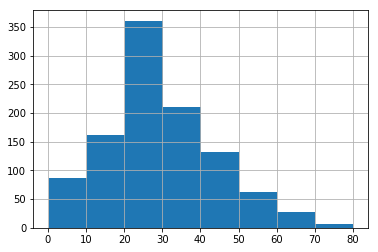

In [455]:
#pd.cut(titanic.age, [0,10,20,30,40,50,60,70,80,90,100]).dropna().hist()
titanic.age.hist(bins=8)

1309
295
295
[ 0.07457627  0.22033898  0.31864407  0.1559322   0.13898305  0.07118644
  0.01694915  0.00338983]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bb1d27c88>], dtype=object)

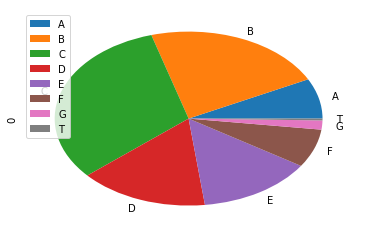

In [456]:
#3. proportion of passengers by cabin floor 
# TODO assumption: cabin floor is represented by char in beginning of cabin attribute
lenN = len(titanic[(titanic.cabin.isnull())])
#print(lenN)
cabins = titanic.cabin.dropna()
lenA = len(cabins[cabins.str.startswith('A')]) #TODO use loop
lenB = len(cabins[cabins.str.startswith('B')])
lenC = len(cabins[cabins.str.startswith('C')])
lenD = len(cabins[cabins.str.startswith('D')])
lenE = len(cabins[cabins.str.startswith('E')])
lenF = len(cabins[cabins.str.startswith('F')])
lenG = len(cabins[cabins.str.startswith('G')])
lenT = len(cabins[cabins.str.startswith('T')])

print(titanic.shape[0])
print(titanic.shape[0] - lenN)
freq=np.array([lenA, lenB, lenC, lenD, lenE, lenF, lenG, lenT])
print(freq.sum())
freq = freq/(titanic.shape[0] - lenN)
print(freq)
floors = pd.DataFrame(freq, index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

floors.plot(kind='pie', subplots=True)

pclass
1    0.619195
2    0.429603
3    0.255289
dtype: float64
pclass
1    0.380805
2    0.570397
3    0.744711
dtype: float64
pclass
1    323
2    277
3    709
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bb1d18c88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f9bb1bc6828>], dtype=object)

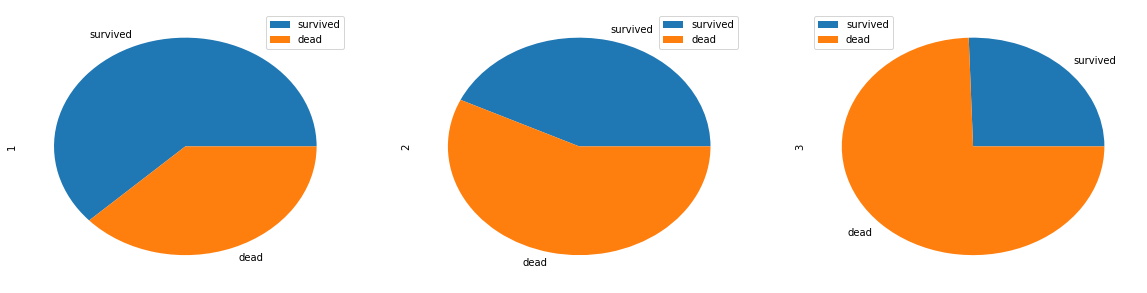

In [457]:
# 4. For each travel class, calculate the proportion of the passengers that survived. 
def sumCol(df, column, val):
    return len(df[df[column]==val])/len(df[column])
def nullNr(df, column):
    return len(df[df[column].isnull()])#/df.size

titanic_survived = titanic.groupby(titanic.pclass).apply(sumCol, 'survived', 1)
print(titanic_survived)
titanic_died = titanic.groupby(titanic.pclass).apply(sumCol, 'survived', 0)
print(titanic_died)
print(titanic.groupby(titanic.pclass).size())
titanic_survClass = pd.concat([titanic_survived, titanic_died], axis=1)
titanic_survClass.rename(columns={0:'survived', 1:'dead'}, inplace=True)
titanic_survClass
titanic_survClass.T.plot(kind='pie', subplots=True, figsize=(20, 5))#TODO nicer titles

pclass  sex   
1       female    0.965278
        male      0.340782
2       female    0.886792
        male      0.146199
3       female    0.490741
        male      0.152130
dtype: float64


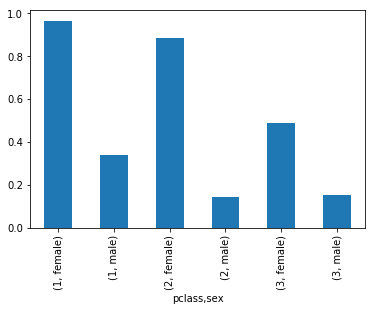

In [458]:
# 5. Calculate the proportion of the passengers that survived by travel class and sex.
# Present your results in a single histogram.
titanic_survivedSex = titanic.groupby(['pclass','sex']).apply(sumCol, 'survived', 1)
print(titanic_survivedSex)
titanic_survivedSex.T.plot(kind='bar') #again, histogram not applicable for categorical data


In [459]:
# 6. Create 2 equally populated age categories and calculate survival proportions
# by age category, travel class and sex.
# Present your results in a `DataFrame` with unique index.

titanic_ageCategories = titanic.copy()
titanic_ageCategories['age'] = pd.qcut(titanic_ageCategories.age, 2)
titanic_ageCategories = titanic_ageCategories.groupby(['age', 'pclass', 'sex']).apply(sumCol, 'survived', 1)
print(titanic_ageCategories)
print(titanic_ageCategories.index)
titanic_ageCategories.index.is_unique

age            pclass  sex   
(0.166, 28.0]  1       female    0.951220
                       male      0.531250
               2       female    0.910714
                       male      0.216216
               3       female    0.513761
                       male      0.183036
(28.0, 80.0]   1       female    0.967391
                       male      0.302521
               2       female    0.872340
                       male      0.083333
               3       female    0.372093
                       male      0.144000
dtype: float64
MultiIndex(levels=[[(0.166, 28.0], (28.0, 80.0]], [1, 2, 3], ['female', 'male']],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['age', 'pclass', 'sex'])


True